In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [458]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Downloads\telecom_users (1).csv")
df1=df.copy()
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
df.shape

(5986, 22)

In [7]:
target=df['Churn']

# check if data is imbalanced

In [133]:
target.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

# drop 'Unnamed: 0','customerID' as these are irrelevent

In [8]:
df.drop(['Unnamed: 0','customerID','Churn'],axis=1,inplace=True)

In [9]:
df.shape

(5986, 19)

# check for null values

In [10]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [255]:
#df['SeniorCitizen'].astype('object')

# check dataype of each column

In [254]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# convert TotalCharges column in numeric form

In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [14]:
df[df.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN


# replace blank values of TotalCharges with 0

In [15]:
df['TotalCharges'][df.TotalCharges.isnull()]=0
df.isnull().sum()

<ipython-input-15-f3e7f66893cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df.TotalCharges.isnull()]=0


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [16]:
#df['TotalCharges'].apply(lambda x: float(x))

# Seperate numerical and categorical columns

In [407]:
object_col=df.dtypes=='object'
object_col['SeniorCitizen']=True
num_col = ~object_col

# check how many unique values each ctegorical column contains

In [429]:
for col in df[df.columns[object_col]].columns:
    print("Column Name :",col,":",set(df[col])," <--> ",len(set(df[col])))

Column Name : gender : {'Male', 'Female'}  <-->  2
Column Name : SeniorCitizen : {0, 1}  <-->  2
Column Name : Partner : {'No', 'Yes'}  <-->  2
Column Name : Dependents : {'No', 'Yes'}  <-->  2
Column Name : PhoneService : {'No', 'Yes'}  <-->  2
Column Name : MultipleLines : {'No', 'Yes', 'No phone service'}  <-->  3
Column Name : InternetService : {'No', 'DSL', 'Fiber optic'}  <-->  3
Column Name : OnlineSecurity : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : OnlineBackup : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : DeviceProtection : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : TechSupport : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : StreamingTV : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : StreamingMovies : {'No', 'Yes', 'No internet service'}  <-->  3
Column Name : Contract : {'Month-to-month', 'One year', 'Two year'}  <-->  3
Column Name : PaperlessBilling : {'No', 'Yes'}  <-->  2
Column Name : Payment

In [421]:
X_train.shape

(4489, 19)

In [260]:
df[df.columns[object_col]]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
1,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic)
2,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
3,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
4,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
5982,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
5983,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check
5984,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


In [408]:
df[df.columns[num_col]]

,tenure,MonthlyCharges,TotalCharges
0,72,24.10,1734.65
1,44,88.15,3973.20
2,38,74.95,2869.85
3,4,55.90,238.50
4,2,53.45,119.50
...,...,...,...
5981,1,95.00,95.00
5982,23,91.10,2198.30
5983,12,21.15,306.05
5984,12,99.45,1200.15


# EDA

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA on categorical predictor

In [406]:
cols=df[df.columns[object_col]].columns

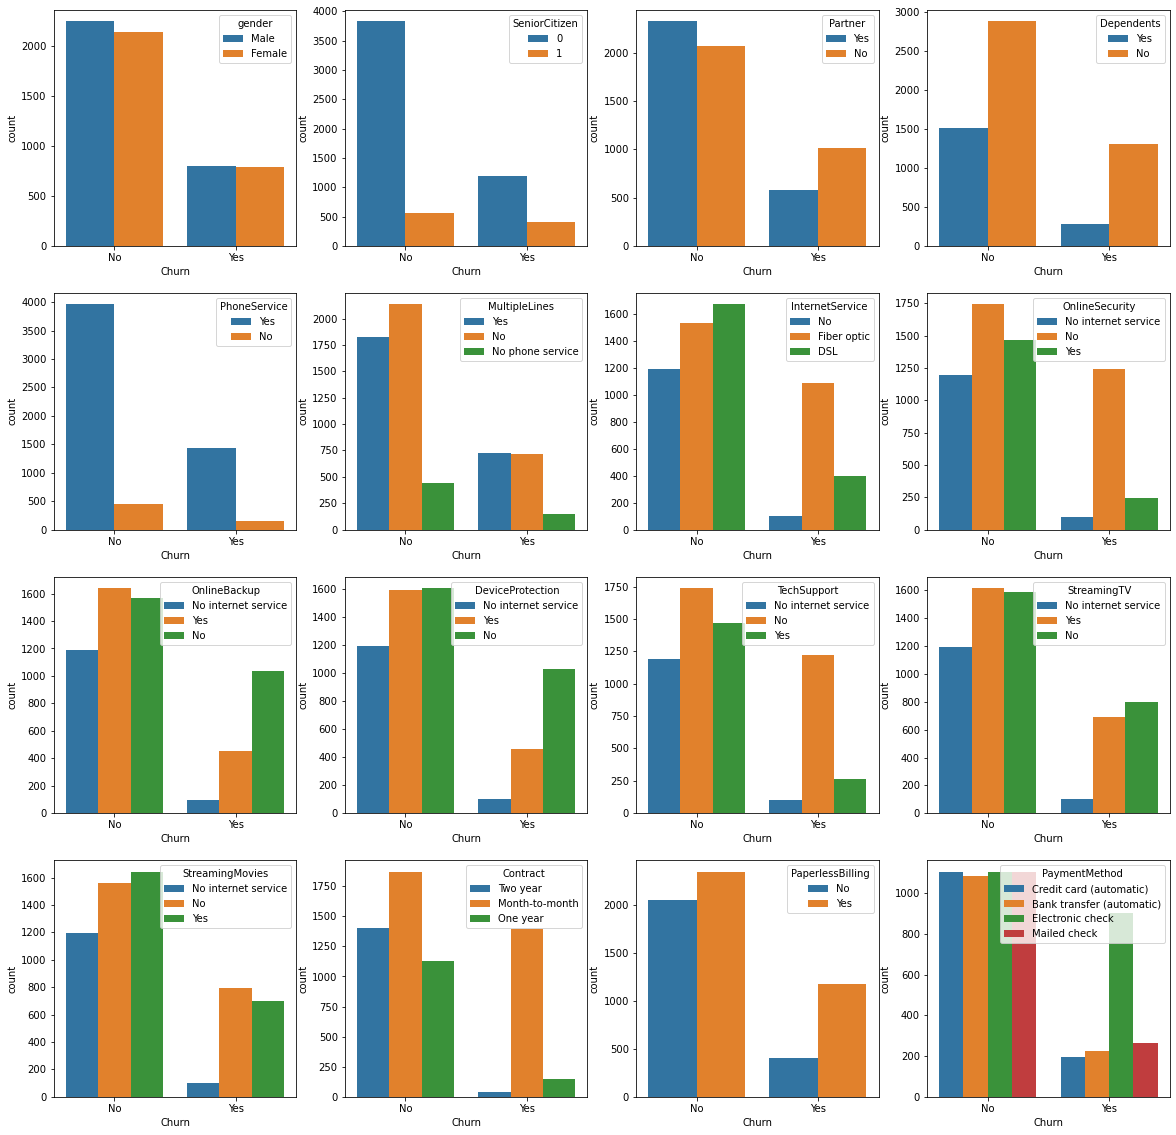

In [266]:
fig, axes = plt.subplots(4,4,figsize=(20,20))
for i,axe in zip(range(16),axes.flatten()):
    sns.countplot(target, data = df, hue=cols[i], ax=axe)
plt.show()

1.	In the very first figure which is gender against churn, gender does not seem to have much impact on target churn. Distribution of male, female for each target type is same. When churn is No, male female both increases in count whereas when is churn is Yes, male, and female both decreases in count. So, gender (male, female) does not seem to be a strong predictor.
2.	Similar pattern we can observe in 1st figure of 2nd row, which is PhoneService against target churn. Distribution of male, female for each target is same.
3.	Rest categorical columns follow different pattern against target churn for its different values (‘Yes’, ‘No’). So those all seem to be good predictor for the task at hand.


# EDA on numerical predictor

In [267]:
cols=df[df.columns[num_col]].columns

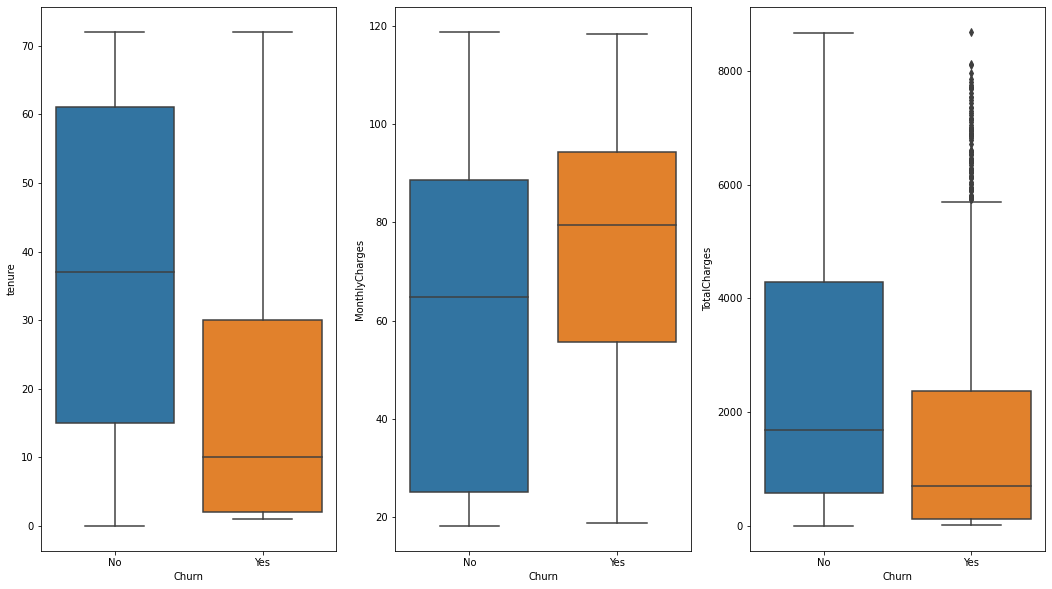

In [276]:
fig, axes = plt.subplots(1,3,figsize=(18,10))
for i,axe in zip(range(3),axes.flatten()):
    sns.boxplot(target, cols[i],data = df, ax=axe)
plt.show()

Following are observations of the above figure-

<li>Customers churn when tenure is low (1st figure). 
<li>Customers churn when monthly charges are higher.
<li>Customers churn when total charges are low.
<li>For each numerical column, average value changes for different values of target, so all of them seem to be good predictors for this task. 


# Plot distribution of numerical predictor against target churn

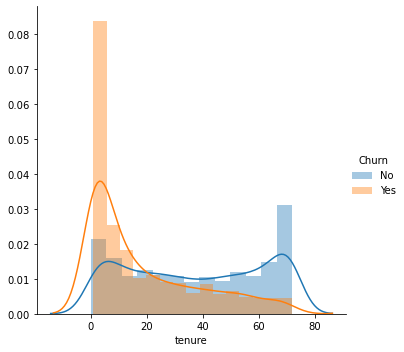

In [468]:
sns.FacetGrid(df1, hue='Churn', size=5 ) \
   .map(sns.distplot, "tenure") \
   .add_legend();
plt.show();

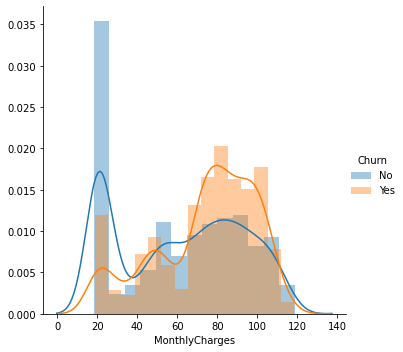

In [469]:
sns.FacetGrid(df1, hue='Churn', size=5 ) \
   .map(sns.distplot, "MonthlyCharges") \
   .add_legend();
plt.show();

Distrinution is indded different for differnt target values

# 1- way Annova to check statistically which all numerical predictors are contributing to the target. 

In [277]:
from scipy.stats import f_oneway

In [409]:
cols=df[df.columns[num_col]].columns

In [410]:
num_cols=[]
for col in cols:
    res=f_oneway(df[col][target=='Yes'], df[col][target=='No'])
    print("P-Value for '",col,"' = ",res[1])
    if(res[1]<0.05):
        num_cols.append(col)
    
num_cols    
#suppressing scientific notation 
#https://www.kite.com/python/answers/how-to-suppress-scientific-notation-in-python#:~:text=Use%20a%20string%20literal%20to,format()%20.

P-Value for ' tenure ' =  1.774696701316516e-170
P-Value for ' MonthlyCharges ' =  4.0904880183731545e-48
P-Value for ' TotalCharges ' =  4.0713147719280728e-53


['tenure', 'MonthlyCharges', 'TotalCharges']

# Chi Square Test to check statistically which all categorical predictors are contributing to target.

In [280]:
from scipy.stats import chi2_contingency

cols=df[df.columns[object_col]].columns

cat_cols=[]

for col in cols:
    pivot_df = pd.crosstab(index=df[col], columns=target)
    chi2, p, dof, ex = chi2_contingency(pivot_df, correction=False)
    print("P-Value for ",col," = ", '{:.10f}'.format(p))
    if(p<0.05):
        cat_cols.append(col)

print("\n",cat_cols)

P-Value for  gender  =  0.4600692428
P-Value for  SeniorCitizen  =  0.0000000000
P-Value for  Partner  =  0.0000000000
P-Value for  Dependents  =  0.0000000000
P-Value for  PhoneService  =  0.4660500727
P-Value for  MultipleLines  =  0.0191440653
P-Value for  InternetService  =  0.0000000000
P-Value for  OnlineSecurity  =  0.0000000000
P-Value for  OnlineBackup  =  0.0000000000
P-Value for  DeviceProtection  =  0.0000000000
P-Value for  TechSupport  =  0.0000000000
P-Value for  StreamingTV  =  0.0000000000
P-Value for  StreamingMovies  =  0.0000000000
P-Value for  Contract  =  0.0000000000
P-Value for  PaperlessBilling  =  0.0000000000
P-Value for  PaymentMethod  =  0.0000000000

 ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


except gender and phone service all seems to be impacting target Churn

# collinearity check

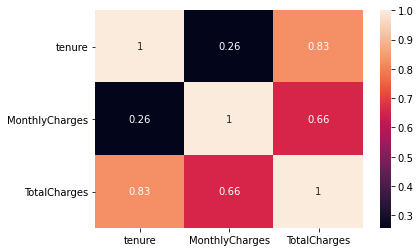

In [281]:
sns.heatmap(df[df.columns[num_col]].corr(),annot=True)

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
num_df=df[df.columns[num_col]]
num_df['const']=1

vif = pd.Series([variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])],index=num_df.columns)
print(vif)

tenure             5.871210
MonthlyCharges     3.250388
TotalCharges       9.642726
const             14.948593
dtype: float64


In [402]:
#num_col['TotalCharges']=False

# Creating pipeline and applying Cross Validation

In [87]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split

In [286]:
categorical=df[df.columns[object_col]].columns
numerical=df[df.columns[num_col]].columns

ct = ColumnTransformer([
                                ("imp", SimpleImputer(missing_values=0, strategy='mean'), numerical),
                                ("ohe", OneHotEncoder(handle_unknown='ignore'), categorical)
                        ])

In [289]:
X_train, X_test, y_train, y_test = train_test_split(df, target)

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

In [340]:
algo=pd.DataFrame(columns=['Accuracy','F1-Score','Precision','Recall','Parameter'])


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723859   0.722888  0.724883   Default


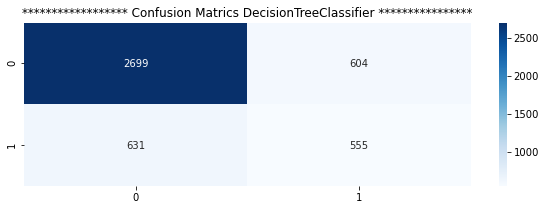

In [342]:
model_d = make_pipeline(ct, DecisionTreeClassifier())
pred = cross_val_predict(model_d, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='DecisionTreeClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723859   0.722888  0.724883   Default
LogisticRegression      0.803074  0.796255   0.793968  0.803074   Default


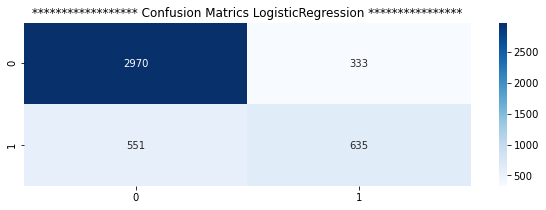

In [343]:
model1 = make_pipeline(ct, LogisticRegression())
pred = cross_val_predict(model1, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='LogisticRegression'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723859   0.722888  0.724883   Default
LogisticRegression      0.803074  0.796255   0.793968  0.803074   Default
RandomForestClassifier  0.789040  0.778740   0.776448  0.789040   Default


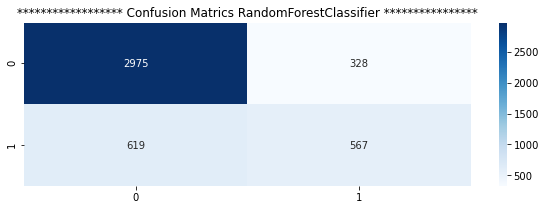

In [344]:
model2 = make_pipeline(ct, RandomForestClassifier())
pred = cross_val_predict(model2, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='RandomForestClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                            Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier      0.724883  0.723859   0.722888  0.724883   Default
LogisticRegression          0.803074  0.796255   0.793968  0.803074   Default
RandomForestClassifier      0.789040  0.778740   0.776448  0.789040   Default
GradientBoostingClassifier  0.799287  0.790536   0.788550  0.799287   Default


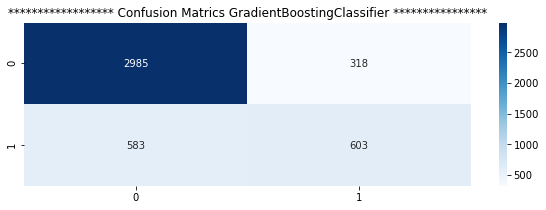

In [379]:
model3 = make_pipeline(ct, GradientBoostingClassifier())
pred = cross_val_predict(model3, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='GradientBoostingClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')

In [375]:
model4 = make_pipeline(ct, SVC())
score = cross_val_score(model4, X_train, y_train, cv=5)
print("SVC = ", np.mean(score))

SVC =  0.7357986160252066


# Try training the models with selected features only(after removing “gender” and “PhoneService” )

In [475]:
ct_selected = ColumnTransformer([
                                ("imp", SimpleImputer(missing_values=0, strategy='mean'), num_cols),
                                ("ohe", OneHotEncoder(handle_unknown='ignore'), cat_cols)
                        ])

In [476]:
x1=ct_selected.fit_transform(X_train)
x2=ct.fit_transform(X_train)

print(x1.shape)
print(x2.shape)

(4489, 42)
(4489, 19)


In [477]:
algo=pd.DataFrame(columns=['Accuracy','F1-Score','Precision','Recall','Parameter'])


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723391   0.722009  0.724883   Default


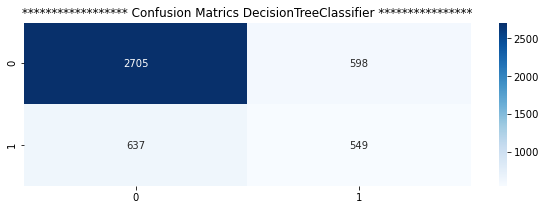

In [478]:
model_d = make_pipeline(ct_selected, DecisionTreeClassifier())
pred = cross_val_predict(model_d, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='DecisionTreeClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723391   0.722009  0.724883   Default
LogisticRegression      0.803297  0.797095   0.794722  0.803297   Default


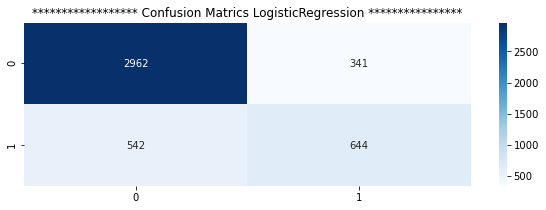

In [479]:
model1 = make_pipeline(ct_selected, LogisticRegression())
pred = cross_val_predict(model1, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='LogisticRegression'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                        Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier  0.724883  0.723391   0.722009  0.724883   Default
LogisticRegression      0.803297  0.797095   0.794722  0.803297   Default
RandomForestClassifier  0.783025  0.772120   0.769482  0.783025   Default


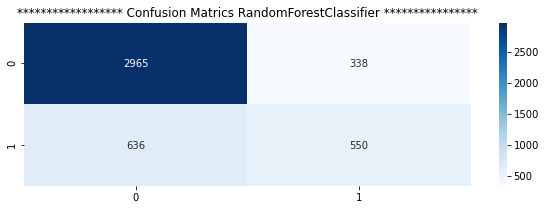

In [480]:
model2 = make_pipeline(ct_selected, RandomForestClassifier())
pred = cross_val_predict(model2, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='RandomForestClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')


                            Accuracy  F1-Score  Precision    Recall Parameter
DecisionTreeClassifier      0.724883  0.723391   0.722009  0.724883   Default
LogisticRegression          0.803297  0.797095   0.794722  0.803297   Default
RandomForestClassifier      0.783025  0.772120   0.769482  0.783025   Default
GradientBoostingClassifier  0.797728  0.789028   0.786903  0.797728   Default


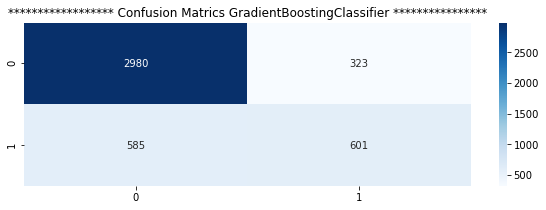

In [481]:
model3 = make_pipeline(ct_selected, GradientBoostingClassifier())
pred = cross_val_predict(model3, X_train, y_train, cv=5)

accuracy=accuracy_score(y_train,pred)
f1=f1_score(y_train, pred, average='weighted')
precision=precision_score(y_train, pred, average='weighted')
recall=recall_score(y_train, pred, average='weighted')
confusion=confusion_matrix(y_train,pred)

model='GradientBoostingClassifier'

algo.loc[model]=[accuracy,f1,precision,recall,'Default']

#print("DecisionTreeClassifier f1_score = ", f1)

#confusion=confusion_matrix(y_train,pred)

print("")
print(algo)

#print("\n******Confusion Matrics*******")
plt.figure(figsize=(10,3))
plt.title("****************** Confusion Matrics "+model+" ****************")
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')

In [482]:
# model8 = make_pipeline(ct, SVC(kernel='linear'))
# score = cross_val_score(model8, X_train, y_train, cv=5)
# print("SVC = ", np.mean(score))

# Hyperparameter Tunning with selected featues only

In [346]:
from sklearn.model_selection import GridSearchCV

In [347]:
param_grid = {}

In [348]:
param_grid['DecisionTreeClassifier'] = { 
                                         'decisiontreeclassifier__criterion':['gini','entropy'],
                                         'decisiontreeclassifier__max_depth': np.arange(3, 15) 
                                       }

In [349]:
grid = GridSearchCV(model_d, param_grid['DecisionTreeClassifier'], cv=5)
grid.fit(X_train, y_train)
#final_grid[i] = grid
test_mean = grid.cv_results_['mean_test_score']

print(grid.best_score_)
print(grid.best_params_)

0.7865883059840646
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4}


In [352]:
param_grid={'logisticregression__C':np.logspace(-3, 3, 5)}

#clf = LogisticRegression()
grid = GridSearchCV(model1, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.808417814392444
{'logisticregression__C': 0.03162277660168379}


In [307]:

param_grid['Random'] = {'randomforestclassifier__n_estimators': [100,200,300],
                        'randomforestclassifier__max_features':["auto", "sqrt", "log2"],
                        'randomforestclassifier__min_samples_split':[2,4,8],
                       }

In [318]:
grid = GridSearchCV(model2, param_grid['Random'], cv=5)
grid.fit(X_train, y_train)
#final_grid[i] = grid
test_mean = grid.cv_results_['mean_test_score']

print(grid.best_score_)
print(grid.best_params_)

0.799730107534891
{'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 100}


In [319]:
# print(grid.best_score_)
# print(grid.best_params_)

In [156]:
param_grid['SVC'] = {'svc__kernel': ('linear','poly'),
                     'svc__C':[1, 10],
                     'svc__gamma': [1e-7, 1e-4]
        
                    }

In [311]:
grid = GridSearchCV(model4, param_grid['SVC'], cv=5)
grid.fit(X_train, y_train)
#final_grid[i] = grid
test_mean = grid.cv_results_['mean_test_score']


print(grid.best_score_)
print(grid.best_params_)

In [147]:
# param_grid['XGBoost'] = {'gradientboostingregressor__n_estimators': [10,20,30],
#                          'gradientboostingregressor__max_depth': [5, 6, 7]}

In [155]:
#X_train.head()

In [310]:
param_grid['XGBoost'] ={
                        'gradientboostingclassifier__n_estimators':[100,200,300,500],
                        'gradientboostingclassifier__max_features':["auto", "sqrt", "log2"],
                        'gradientboostingclassifier__max_depth':[2,4,8],
                        "gradientboostingclassifier__learning_rate": [0.01,0.1],
                       }
         


grid = GridSearchCV(model3, param_grid['XGBoost'], cv=5)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

0.8055214982880325
{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__n_estimators': 500}


# Try Deep Learning Model  (MLP)

In [161]:
import tensorflow as tf
import math
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout 
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard,EarlyStopping

In [165]:
ct.fit(X_train)
x=ct.transform(X_train)

In [383]:
y=y_train.map(lambda x: 0 if x=='No' else 1)
#y

In [365]:
import math
import numpy as np

model_2 = Sequential()
model_2.add(Dense(60, input_dim=x.shape[1], activation='relu',kernel_initializer = "uniform"))
#model_1.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model_2.compile(optimizer=opt, loss='binary_crossentropy',metrics='accuracy')
model_2.summary()
early_stopping_cb = EarlyStopping(patience=10,restore_best_weights=True)
run_logdir=r"C:\Users\Deepak Tripathi\Desktop\rossman\log"
history = model_2.fit(np.array(x), y, batch_size=len(x),validation_split=0.10 ,epochs=500000, verbose=1,callbacks=[early_stopping_cb])  

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 60)                2760      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 61        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500000
1/1 [==============================] - 0s 361ms/step - loss: 73.9383 - accuracy: 0.2661 - val_loss: 8976.7588 - val_accuracy: 0.7171
Epoch 2/500000
1/1 [==============================] - 0s 51ms/step - loss: 8445.2432 - accuracy: 0.7339 - val_loss: 1171328.7500 - val_accuracy: 0.2829
Epoch 3/500000
1/1 [==============================] - 0s 60ms/step - loss: 1171966.5000 - accuracy: 0.2661 - val_loss: 0.6865 - val_accuracy: 0.7595
Epoch 4/500000
1/1 [==============================] - 0s 52ms/st

1/1 [==============================] - 0s 49ms/step - loss: 0.5688 - accuracy: 0.7433 - val_loss: 0.5771 - val_accuracy: 0.7171
Epoch 54/500000
1/1 [==============================] - 0s 48ms/step - loss: 0.5714 - accuracy: 0.7342 - val_loss: 0.5794 - val_accuracy: 0.7171
Epoch 55/500000
1/1 [==============================] - 0s 46ms/step - loss: 0.5724 - accuracy: 0.7339 - val_loss: 0.5785 - val_accuracy: 0.7171
Epoch 56/500000
1/1 [==============================] - 0s 43ms/step - loss: 0.5717 - accuracy: 0.7339 - val_loss: 0.5748 - val_accuracy: 0.7216
Epoch 57/500000
1/1 [==============================] - 0s 47ms/step - loss: 0.5693 - accuracy: 0.7347 - val_loss: 0.5692 - val_accuracy: 0.7461
Epoch 58/500000
1/1 [==============================] - 0s 42ms/step - loss: 0.5658 - accuracy: 0.7433 - val_loss: 0.5628 - val_accuracy: 0.7595
Epoch 59/500000
1/1 [==============================] - 0s 54ms/step - loss: 0.5620 - accuracy: 0.7574 - val_loss: 0.5558 - val_accuracy: 0.7639


# So best models so far are logistic regression and GradientBoostingClassifier. 

# lets check their performence on test data and select the final model

# logistic regression

In [489]:
model1 = make_pipeline(ct_selected, LogisticRegression(C = 0.03162277660168379))

model1.fit(X_train, y_train)

model1.score(X_test,y_test)

0.7949231796927188

# GradientBoostingClassifier

In [491]:
model3 = make_pipeline(ct_selected, GradientBoostingClassifier(learning_rate = 0.01,max_depth = 4, max_features = 'log2' , n_estimators = 500))

model3.fit(X_train, y_train)

model3.score(X_test,y_test)


0.8036072144288577

# Conclusion

GradientBoostingClassifier has performed slightly better than logistic regression

# Feature importence with gradient boosting

In [455]:
from sklearn.preprocessing import OrdinalEncoder

categorical=df[df.columns[object_col]].columns
numerical=df[df.columns[num_col]].columns

ct = ColumnTransformer([
                                ("imp", SimpleImputer(missing_values=0, strategy='mean'), numerical),
                                ("ohe", OrdinalEncoder(), categorical)
                        ])

x=ct.fit_transform(X_train)

clf = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 4, max_features = 'log2' , n_estimators = 500)

clf.fit(x,y_train)

index=np.array(clf.feature_importances_).argsort()[::-1]
X_train.columns[[index]]

Index(['PaymentMethod', 'gender', 'Partner', 'DeviceProtection',
       'SeniorCitizen', 'StreamingMovies', 'OnlineBackup', 'TechSupport',
       'TotalCharges', 'StreamingTV', 'MonthlyCharges', 'PaperlessBilling',
       'OnlineSecurity', 'Contract', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'Dependents'],
      dtype='object')